# Beam Shape Analysis - Cleaved Fibre

### What does this notebook do?

Experimental analysis
- Import Gaussian beamshape data and z values through pandas to np arrays
- Translate and transform Gaussians to reduce fitting parameters 
- Fit the beamshape Gaussians to a one parameter fit to find their waists, w
- multiply z by sin(theta), where theta is the elevation angle of the setup - so that we resolve the projection onto the camera image
- Plot ws vs zsin(theta) and fit to (Two/ three parameter?) Fit
- Key: what is z0 and w0 experimentally for the fibre?

Theoretical Analysis
- Takes in wavelength, NA, core radius to calculate V number
- Use marcuse relation to find minumum waist
- Comparison?

In [1]:
''' IMPORTANT: compared to annotated picture, 11th data point was deleted due to corrupted file. File was called '1007'. Therefore now working with 1 less data point'''

" IMPORTANT: compared to annotated picture, 11th data point was deleted due to corrupted file. File was called '1007'. Therefore now working with 1 less data point"

## Import all useful libraries / tools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from os import listdir
import scipy

from lvl4_functions import *

## Import Data

In [3]:
# Define useful path to data
globalpath = "C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/1. Data Analysis/Christmas Report/Cleaved-2/Data2/"

In [4]:
# Import data
distances, amplitudes = import_data(globalpath)

['01.csv', '02.csv', '03.csv', '04.csv', '05.csv', '1001.csv', '10011.csv', '1002.csv', '10021.csv', '1003.csv', '10031.csv', '1004.csv', '10041.csv', '1005.csv', '1006.csv', '1008.csv', '1009.csv', '10091.csv', '10092.csv', '10093.csv', '10094.csv']


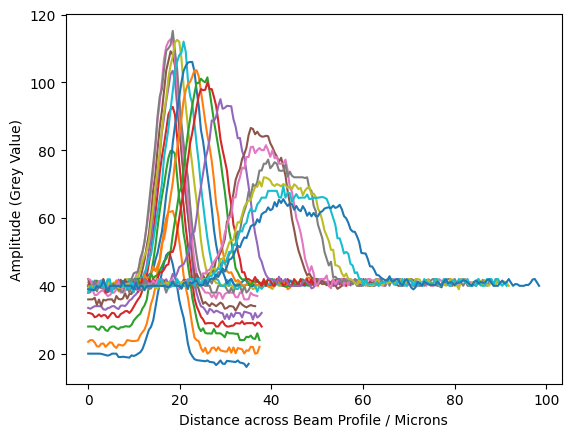

In [5]:
# Quick plot of raw data
for i in range(len(distances)):
    plt.plot(distances[i], amplitudes[i])

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Amplitude (Grey Value)')

plt.show()

## Normalise, cut down data

In [6]:
all_distances, all_amps = data_trim(distances, amplitudes, 10000000)

## Errors - for above normalised Gaussians

In [7]:
''' Error on cross sectional distance'''
# Scale says ~2 pixels / microns therefore 0.5 microns / pixel
# so lets set error as 0.5 microns

all_distances_errors = []

for i in range(len(all_distances)):
    all_distances_errors.append(np.ones(np.size(all_distances[i]))*0.5) # takes into account different sized data sets

''' Error on amplitude '''
# Grey value resolution = 1

all_amps_errors = []

for i in range(len(all_amps)):
    err = 1 / np.max(amplitudes[i])
    all_amps_errors.append(np.ones(np.size(all_amps[i]))*err) # takes into account different sized data sets

Plot Normalised Gaussian Curves with Errors

Text(0, 0.5, 'Normalised Amplitude')

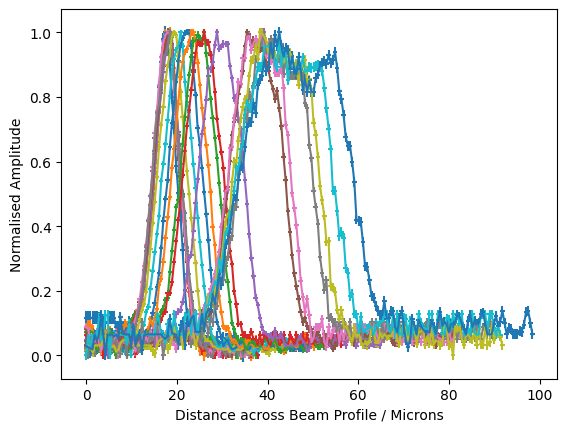

In [8]:
for i in range(len(all_distances)):
    plt.errorbar(all_distances[i], all_amps[i], xerr=all_distances_errors[i],yerr=all_amps_errors[i])

plt.xlabel('Distance across Beam Profile / Microns')
plt.ylabel('Normalised Amplitude')

<ErrorbarContainer object of 3 artists>

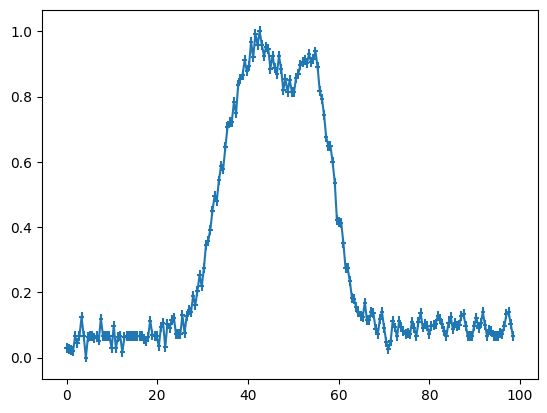

In [9]:
# Plot of a far field 'Gaussian' - is this a TEM10 mode?
plt.errorbar(all_distances[-1], all_amps[-1], xerr=all_distances_errors[-1],yerr=all_amps_errors[-1])

## Fit Data

Text(0.5, 1.0, 'Waist Size Trend - Errorbars too small to see')

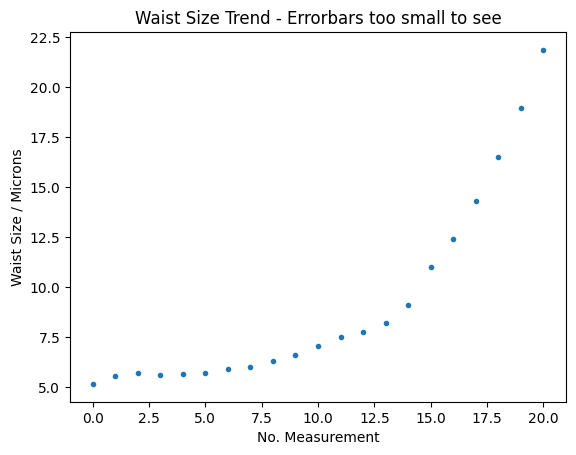

In [10]:
# Create some empty arrays to store values of interest
params_ = np.zeros((len(all_distances),2))
y_fits = [] # NB: this has to be a list due to different sized arrays sitting in it
params_errs_ = np.zeros((len(all_distances),2))
chi_red_array = np.zeros(len(all_distances))

# Populate initial guess array - important to change per data set!!
initial_guesses = np.zeros((len(all_distances),2))
initial_guesses[:,1] = 20
initial_guesses[:,0] = 3
initial_guesses[5,0] = 15
initial_guesses[6,0] = 15
initial_guesses[14:,0] = 40
initial_guesses[14:,1] = 50
initial_guesses[0,0] = 0.2

for i in range(len(all_distances)):
    singlefit, params_[i], params_errs_[i], chi_red_array[i] = fit_labs(all_distances[i],all_amps[i], all_amps_errors[i], Gauss, initial_guesses[i])
    y_fits.append(singlefit)

waists = params_[:,0]
waists_errs = params_errs_[:,0]

# Plot waist trend 
plt.errorbar(np.arange(len(distances)),waists, yerr = waists_errs, linestyle = '', marker = 'o', ms = 3)
plt.xlabel('No. Measurement')
plt.ylabel('Waist Size / Microns')
plt.title('Waist Size Trend - Errorbars too small to see')

#print(waists, waists_errs)

## Calculating Z values and Plotting Waist size against Z

In [11]:
# Define Global Path for where 'z' values are stored
z_path = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/1. Data Analysis/Christmas Report/Cleaved-2/Data2/zs.csv'

# Import as dataframe
df_lengths = pd.read_csv(z_path)

# Convert to array. Called 'lengths' as this isnt the z values yet
lengths = np.array(df_lengths['Length'])

# Take error as pixel width ie 0.5 microns (1sf)
lengths_errs = np.ones(len(lengths))*0.5

In [12]:
print(lengths)

[ -9.254  -7.586  -5.21   -3.085  -1.42    0.      2.613   5.21    7.822
  10.434  13.257  16.331  19.187  21.787  28.17   40.04   48.285  60.869
  75.791  88.812 107.279]


This 'lengths' value MIGHT need to be multiplied by cos theta? Where theta is angle of elevation of the fibre... but won't do this yet.

## Fit Waists vs Z

In [13]:
# Need wavelength of light to calc. Rayleigh Range (in microns)
wavelength = 0.405
wavelength_err = 0.005 # according to online spec (THORLABS CPS405)

Angle of elevation

C:\Users\abiga\AppData\Local\Temp\ipykernel_12064\4211629687.py:20: RuntimeWarning: divide by zero encountered in divide
  zs_err = zs*np.sqrt( (sin_err / np.sin(angle))**2 + (lengths_errs/lengths)**2 )
C:\Users\abiga\AppData\Local\Temp\ipykernel_12064\4211629687.py:20: RuntimeWarning: invalid value encountered in multiply
  zs_err = zs*np.sqrt( (sin_err / np.sin(angle))**2 + (lengths_errs/lengths)**2 )


<ErrorbarContainer object of 3 artists>

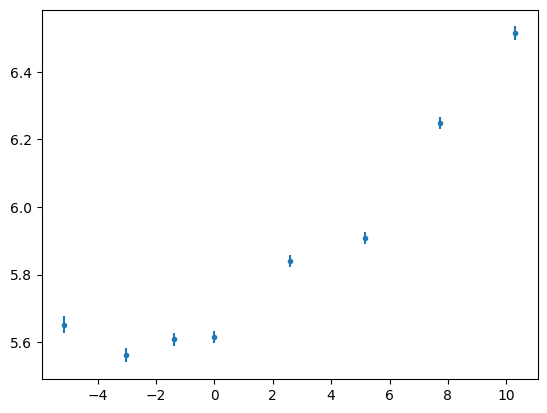

In [14]:
# online protractor at https://www.ginifab.com/feeds/angle_measurement/ 
# NB: see image 'C:\Users\abiga\OneDrive - Durham University\1. Fourth Year\1. Project\1. Data Analysis\Christmas Report\Cleaved-2\Cleaved - fibre- pics\cleaved_elev_angle'

angle_deg = 9
angle_deg_err = 1
angle = angle_deg * np.pi / 180
angle_err = angle_deg_err * np.pi / 180


zs = lengths*np.cos(angle)
waists = waists*np.cos(angle) 
''' I think its both cos here .. please sort out errors!'''


sin_err = np.abs(np.sin(angle + angle_err) - np.sin(angle))
# cos_err = np.abs(np.cos(angle + angle_err) - np.cos(angle))
# waists_comp_err = waists_comp*np.sqrt( (sin_err / np.sin(angle))**2 + (waists_errs/waists)**2 )
# print(waists_comp_err)

zs_err = zs*np.sqrt( (sin_err / np.sin(angle))**2 + (lengths_errs/lengths)**2 )

plt.errorbar(zs[2:10], waists[2:10], yerr = waists_errs[2:10], linestyle = '', marker = 'o', ms = 3)


In [15]:
waist_fit, params, params_errs, chisqu_WvsZ = fit_labs(zs, waists, waists_errs, WvsZ, np.array([5,1,2]))
w0, z0,RR= params
w0_err, z0_err,RR_err = params_errs

The minimum waist is 5.232624020735001 pm 0.017434962793420695
The distance from the first measurement to the minimum waist is -12.16441532942223 pm 0.20924447056716663
The Rayleigh Range is 29.020816398233947 pm 0.06961356821773972.


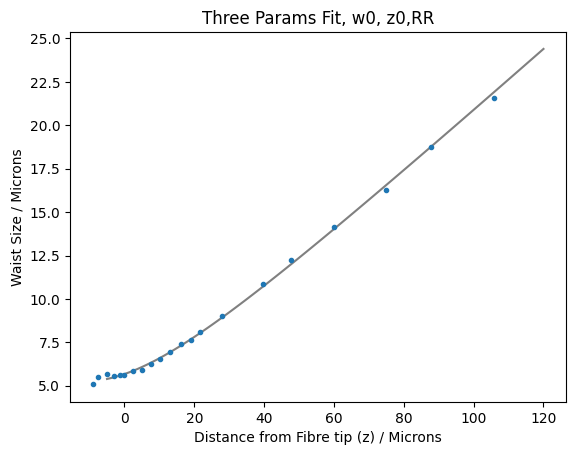

In [16]:
# Plot waists vs Z:
plt.errorbar(zs, waists, yerr = waists_errs, linestyle = '', marker = 'o', ms = 3)
plt.plot(np.linspace(-5,120,100), WvsZ(np.linspace(-5,120,100), w0, z0,RR), color = 'grey')

plt.xlabel('Distance from Fibre tip (z) / Microns')
plt.ylabel('Waist Size / Microns')
plt.title('Three Params Fit, w0, z0,RR')

#plt.plot(np.linspace(-5,20,100), WvsZ(np.linspace(-5,20,100), 3.22, z0,RR), color = 'red')

#plt.plot(np.linspace(-100,450,100), WvsZ(np.linspace(-100,450,100), 3, z0), color = 'green')
#plt.scatter(lengths*np.cos(np.pi / 12),waists*np.cos(np.pi / 12), color = 'darkgreen')


print('The minimum waist is {} pm {}'.format(w0, w0_err))
print('The distance from the first measurement to the minimum waist is {} pm {}'.format(z0, z0_err))
#print('The weird systematic error Y is {} pm {}'.format(Y0, Y0_err))
print('The Rayleigh Range is {} pm {}.'.format(RR,RR_err))

In [17]:
print('The wavelength check in nanometres is {} nm'.format(wavelength_check(w0,RR)))
print('This is approx. {}x the actual wavelength'.format( wavelength_check(w0,RR) / 405 ))

The wavelength check in nanometres is 2964.007567740246 nm
This is approx. 7.318537204296904x the actual wavelength


## Comparison to Experiment - Ray Optics Model

Find k0 and define constants 

In [18]:
# Defining Parameters of set-up
# info about fibre from 35m cable:
''' https://www.thorlabs.com/drawings/b4627de8c1f781cd-1251149A-D70E-815D-5BD8491D7FDA5B7B/PM1550-HP-SpecSheet.pdf '''

NA = 0.14 # numerical aperture 
NA_err = 0.01

k0 = find_k(wavelength)
k0_err = np.abs(find_k(wavelength+wavelength_err) - k0)
print(k0, k0_err)

a = 9.2e-6 / 2 # core radius, in metres 
a_err = 0.1e-6 / 2 

15514037.795505151 189195.5828720145


Find V_no and its error

In [19]:
V_no = V_number(NA, k0, a)

EC_NA = np.abs(V_number(NA+NA_err, k0, a) - V_no)
EC_k0 = np.abs(V_number(NA, k0+k0_err, a)- V_no)
EC_a = np.abs(V_number(NA, k0, a+a_err) - V_no)

V_no_err = np.sqrt(EC_NA**2 + EC_k0**2 + EC_a**2)

In [20]:
print('The predicted V no is {} pm {}'.format(V_no, V_no_err))

The predicted V no is 9.99104034030532 pm 0.7320719127024782


Using the Marcuse relation to compute theoretical minimum waist from V number and core radius

In [21]:
w0_theory = marcuse(V_no,a)

# error on w0
cont_V_no = np.abs(marcuse(V_no+V_no_err,a) - w0_theory)
cont_a = np.abs(marcuse(V_no,a+a_err) - w0_theory)

w0_theory_err = np.sqrt(cont_V_no**2 + cont_a**2)

In [22]:
print('The predicted minimum waist using the ray optics model is {} pm {} microns'.format(w0_theory,w0_theory_err))

The predicted minimum waist using the ray optics model is 3.2258376461429026 pm 0.042342748239619886 microns
